Derive and implement the gradient descent learning algorithm for a single-layer perceptron used for regression. The perceptron model for regression can be represented as:

$\hat{y} = w \cdot x + b $

where:
- $\hat{y}\ $ is the predicted output,
- \$ w \$ is the weight,
- \$ x \$ is the input,
- \$ b \$ is the bias.

The objective is to minimize the mean squared error (MSE) loss:

 $\text{MSE} = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 \$

where:
- \$ n \$ is the number of samples,
- \$ \hat{y}_i \$ is the predicted output for the \$ i\$-th sample,
- \$ y_i \$ is the true output for the \$ i\$-th sample.

Now, let's derive the gradient for the weight \$ w \$ and bias $\ b \$.

### Derivation of Gradients:

The gradient for the weight (\( w \)) is given by:

\$ \frac{\partial \text{MSE}}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \cdot x_i \$

The gradient for the bias (\( b \)) is given by:

\$ \frac{\partial \text{MSE}}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \$

### Gradient Descent Update:

The weight (\( w \)) and bias (\( b \)) are updated using the following rules:

\$ w \leftarrow w - \alpha \frac{\partial \text{MSE}}{\partial w} \$

\$ b \leftarrow b - \alpha \frac{\partial \text{MSE}}{\partial b} \$

where:
- \$ \alpha \$ is the learning rate.

See Implementation belowe..

This is a basic implementation for educational purposes. In a real-world scenario, you might want to add features such as mini-batch processing and regularization for better performance and stability.

Weight (w): [[3.23112218]]
Bias (b): 3.92614534909078


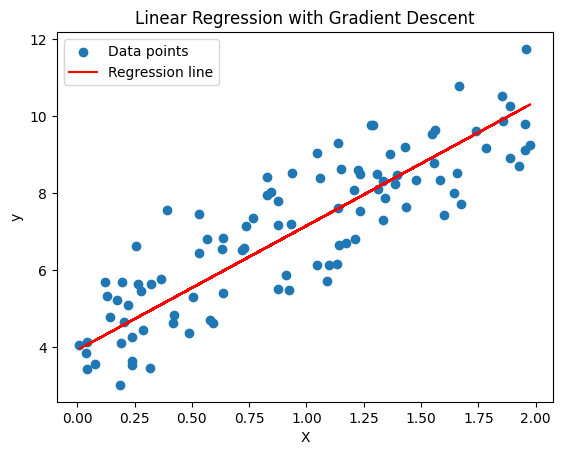

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for illustration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Initialize parameters
w = np.random.randn(1, 1)
b = np.random.randn()

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Gradient Descent
for epoch in range(epochs):
    # Forward pass
    y_pred = np.dot(X, w) + b

    # Compute gradients
    dw = np.mean((y_pred - y) * X)
    db = np.mean(y_pred - y)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

# Print the final parameters
print("Weight (w):", w)
print("Bias (b):", b)



# Plot the data and regression line
plt.scatter(X, y, label='Data points')
plt.plot(X, np.dot(X, w) + b, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Gradient Descent')
plt.show()


The mathematical steps for the Levenberg-Marquardt (LM) batch learning algorithm applied to a single perceptron for the regression task.

### Objective Function:
Consider the mean squared error (MSE) as the objective function:

\$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y_{\text{pred}}^{(i)} - y^{(i)})^2 \$

where \$ m \$ is the number of samples, \$ y_{\text{pred}}^{(i)} \$ is the predicted output for the \$ i \$-th sample, and \$ y^{(i)} \$ is the true output.

### Model Prediction:
\$ y_{\text{pred}} = w \cdot X + b \$

### Jacobian Matrix:
The Jacobian matrix \$ J \$ is computed by stacking the input features \$ X \$ with a column of ones:

Jacobian is  \begin{bmatrix} X & 1 \end{bmatrix}

### Residuals:
\$text{residuals} = y_{\text{pred}} - y \$

### Hessian Matrix:
\$H = J^T \cdot J + \lambda \cdot I \$

where \$ \lambda \$ is a regularization parameter and \$ I \$ is the identity matrix.

### Update Rule:
\$ \text{update} = (J^T \cdot J + \lambda \cdot I)^{-1} \cdot J^T \cdot \text{residuals} \$

### Parameter Update:
\$ w \leftarrow w - \text{update}[:-1] \$
\$ b \leftarrow b - \text{update}[-1] \$

### Convergence Check:
Check for convergence using the \$ L_2 \$ norm of the update vector. If \$ ||\text{update}||_2 < \text{tolerance} \$, then the algorithm has converged.

### Iterative Process:
Repeat the process for a specified number of epochs until convergence.

This process iteratively updates the weights \$ w \$ and bias \$ b \$ to minimize the mean squared error, effectively training the perceptron using the Levenberg-Marquardt algorithm.

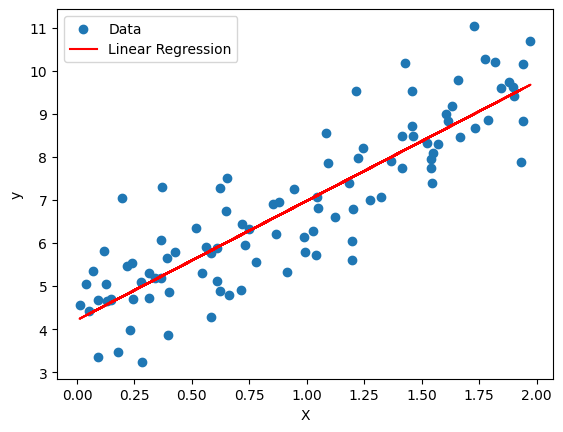

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[X, np.ones((100, 1))]

# Initialize weights and other parameters
w = np.random.randn(2, 1)
lambda_reg = 0.1  # Regularization parameter
epochs = 100
tolerance = 1e-6

# Levenberg-Marquardt batch learning
for epoch in range(epochs):
    # Model prediction
    y_pred = X_b.dot(w)

    # Residuals
    residuals = y_pred - y

    # Jacobian matrix
    J = X_b

    # Hessian matrix
    H = J.T.dot(J) + lambda_reg * np.eye(2)

    # Update rule
    update = np.linalg.inv(H).dot(J.T).dot(residuals)

    # Update weights
    w -= update[:-1]

    # Check for convergence
    if np.linalg.norm(update) < tolerance:
        print(f"Converged after {epoch + 1} epochs.")
        break

# Plot the original data and the linear regression fit
plt.scatter(X, y, label='Data')
plt.plot(X, X_b.dot(w), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
